<a href="https://colab.research.google.com/github/vimesh630/Automated-Image-Caption-Generator/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

In [29]:
!pip install opencv-python pillow nltk matplotlib
!pip install -U nltk  # Ensure NLTK is updated if not already

# Import Required Libraries
import os
import cv2
import nltk
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
import nltk
from nltk.tokenize import word_tokenize
from PIL import Image

nltk.download('punkt')  # Download Punkt Sentence Tokenizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Mount Google Drive

In [30]:
# Mount Google Drive if needed to save files or intermediate results
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set Up Paths & Directories

In [31]:
# Define Paths (Modify this based on your Drive structure)
base_dir = "/content/drive/MyDrive/Individual projects/Automated-Caption-Generator"
images_dir = os.path.join(base_dir, "Images")  # Folder containing images
caption_file = os.path.join(base_dir, "captions.txt")  # Captions text file
output_dir = os.path.join(base_dir, "preprocessed")  # Output folder

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

Load image Paths

In [32]:
def load_image_paths(images_dir):
    """
    Load image file names from the given directory.
    Returns a list of valid image file paths.
    """
    valid_extensions = ('.jpg', '.jpeg', '.png')
    image_paths = []

    for filename in os.listdir(images_dir):
        if filename.lower().endswith(valid_extensions):
            image_paths.append(os.path.join(images_dir, filename))

    print(f"Total images found: {len(image_paths)}")
    return image_paths

Load Captions and Preprocess

In [33]:
def preprocess_caption(caption):
    """
    Tokenizes the caption, converts to lowercase, and removes punctuation.
    """
    tokens = word_tokenize(caption.lower())  # Convert to lowercase & tokenize
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    return tokens


def load_captions(caption_file_path):
    """
    Load captions into a dictionary mapping image filenames to lists of tokenized captions.
    The file format: "image,caption" with a header row.
    """
    captions_dict = {}

    with open(caption_file_path, 'r', encoding='utf-8') as file:
        next(file)  # Skip the header line

        for line in file:
            line = line.strip()
            if not line:
                continue

            # Split by the first comma to avoid breaking captions with commas
            parts = line.split(',', 1)
            if len(parts) != 2:
                continue

            image_filename, caption = parts
            tokens = preprocess_caption(caption)  # Preprocess caption

            if image_filename not in captions_dict:
                captions_dict[image_filename] = []
            captions_dict[image_filename].append(caption)  # Store original caption

    print(f"Total unique images with captions: {len(captions_dict)}")
    return captions_dict

Image Preprocessing

In [34]:
def preprocess_images(images_dir, target_size=(224, 224)):
    """
    Reads images, resizes them, converts to arrays, and normalizes pixel values.
    Returns a dictionary mapping filenames to preprocessed images.
    """
    image_data = {}

    for filename in os.listdir(images_dir):
        file_path = os.path.join(images_dir, filename)

        try:
            # Open image and convert to RGB
            image = Image.open(file_path).convert('RGB')

            # Resize image
            image = image.resize(target_size)

            # Convert to NumPy array and normalize pixel values
            image_array = np.array(image) / 255.0  # Normalize (0-1 range)

            image_data[filename] = image_array

        except Exception as e:
            print(f"Error processing {filename}: {e}")

    print(f"Total preprocessed images: {len(image_data)}")
    return image_data

Save Preprocessed data

In [35]:
def save_preprocessed_data(data, file_path):
    """
    Saves preprocessed data using pickle.
    """
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)
    print(f"Saved data to: {file_path}")

Show Image with Caption

In [36]:
def show_sample_image(images_dir, captions_dict):
    """
    Displays a random sample image with one of its captions.
    """
    if not captions_dict:
        print("No captions available.")
        return

    # Choose a random image with captions
    random_image_filename = random.choice(list(captions_dict.keys()))
    random_caption = random.choice(captions_dict[random_image_filename])  # Pick one caption

    # Load and display the image
    image_path = os.path.join(images_dir, random_image_filename)
    image = Image.open(image_path)

    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis("off")  # Hide axes
    plt.title(random_caption, fontsize=14, color='blue')
    plt.show()

    print(f"Image: {random_image_filename}")
    print(f"Caption: {random_caption}")

Main Preprocessing Pipeline

Loading image paths...
Total images found: 8092

Loading captions...
Total unique images with captions: 8091

Preprocessing images...
Total preprocessed images: 8092
Saved data to: /content/drive/MyDrive/Individual projects/Automated-Caption-Generator/preprocessed/preprocessed_images.pkl
Saved data to: /content/drive/MyDrive/Individual projects/Automated-Caption-Generator/preprocessed/preprocessed_captions.pkl

Preprocessing complete!


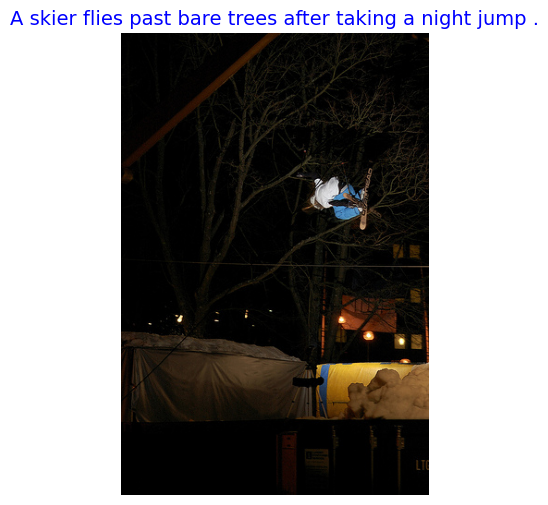

Image: 3239866450_3f8cfb0c83.jpg
Caption: A skier flies past bare trees after taking a night jump .


In [37]:
# Load images and captions
print("Loading image paths...")
image_paths = load_image_paths(images_dir)

print("\nLoading captions...")
captions_dict = load_captions(caption_file)

print("\nPreprocessing images...")
preprocessed_images = preprocess_images(images_dir)

# Save the preprocessed data
save_preprocessed_data(preprocessed_images, os.path.join(output_dir, 'preprocessed_images.pkl'))
save_preprocessed_data(captions_dict, os.path.join(output_dir, 'preprocessed_captions.pkl'))

print("\nPreprocessing complete!")

# Show a sample image and caption
show_sample_image(images_dir, captions_dict)